<a href="https://colab.research.google.com/github/rajy4683/EIP4_Session2/blob/master/MNIST12K9944.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D, GlobalAveragePooling2D, AveragePooling2D
from keras.utils import np_utils
from keras.utils import plot_model

from keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


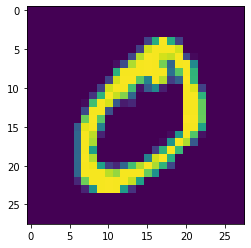

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [8]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [51]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(32, 3, 3, activation='relu')) #24
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1, activation='relu')) #22

model.add(MaxPooling2D(pool_size=(2, 2)))#11

model.add(Convolution2D(16, 3, 3, activation='relu'))#9
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, activation='relu'))#7
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, activation='relu'))#5
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, activation='relu'))#3
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(AveragePooling2D())
model.add(AveragePooling2D())

model.add(Convolution2D(10, 1, 1))

#model.add(Convolution2D(10, 4, 4))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_29 (Batc (None, 26, 26, 10)        40        
_________________________________________________________________
dropout_29 (Dropout)         (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 24, 24, 32)        2912      
_________________________________________________________________
batch_normalization_30 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_30 (Dropout)         (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 24, 24, 10)       

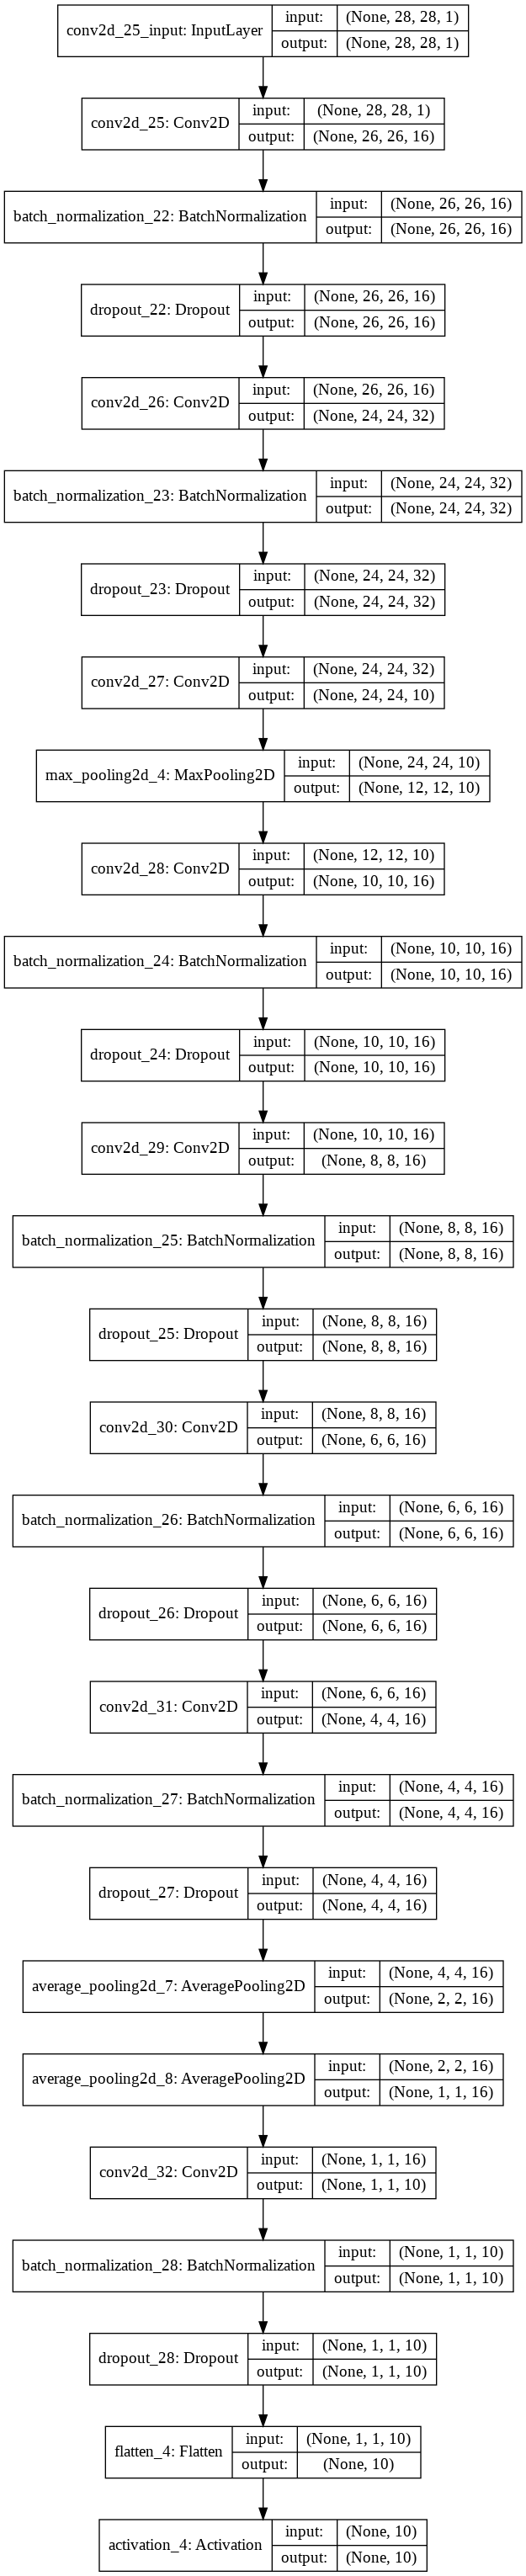

In [50]:
plot_model(model, 'latest.png', show_shapes=True)

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
import numpy as np
lr_change_array = []

def scheduler(epoch, lr):
  #new_lr = round(0.003 * 1/(1 + 0.319 * epoch), 10)
  new_lr = round(0.003 * 1/(1 + 0.289 * epoch), 10)
  #new_lr = round(0.003 * 1/(1 + 0.300 * epoch), 10)
  return new_lr 
  #round(0.003 * 1/(1 + 0.300 * epoch), 10) 



In [54]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])
history = [0] *20


#history[0]=model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])
history[0]=model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 19s 322us/step - loss: 0.4920 - acc: 0.8677 - val_loss: 0.1068 - val_acc: 0.9781
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0023273856.
60000/60000 [==============================] - 11s 185us/step - loss: 0.2472 - acc: 0.9269 - val_loss: 0.0731 - val_acc: 0.9835
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0019011407.
60000/60000 [==============================] - 11s 184us/step - loss: 0.1941 - acc: 0.9422 - val_loss: 0.0410 - val_acc: 0.9914
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0016068559.
60000/60000 [==============================] - 11s 185us/step - loss: 0.1676 - acc: 0.9479 - val_loss: 0.0430 - val_acc: 0.9900
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013914657.
60000/60000 [==

In [55]:
lr_change_array

[]

In [56]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.021548032833146862, 0.9944]


In [0]:
model.save('9944_accuracy.hdf5')

In [0]:
def plot_losses(history, bound_lower=0.002, bound_upper=1):
    plt.figure(figsize=(15,5))
    plt.plot(history.history['loss'],linestyle='-.')
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    #plt.legend(names, loc='upper left')
    axes = plt.gca()
    axes.set_ylim([bound_lower,bound_upper])
    plt.show()

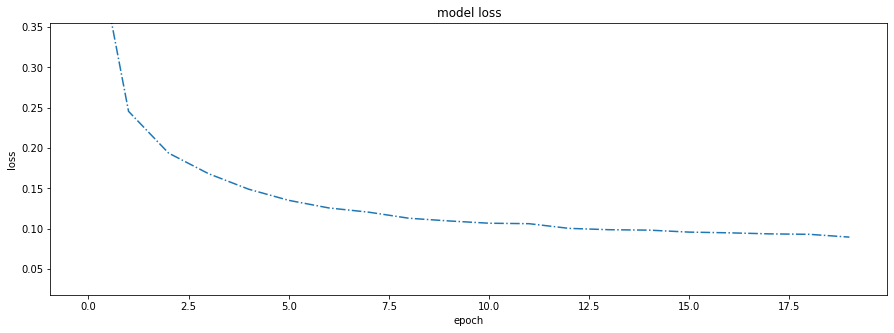

In [18]:
plot_losses(history[0], 0.0180, 0.355)

In [43]:
history[0].history

{'acc': [0.9533666666984558,
  0.9563666666984558,
  0.9562833333333334,
  0.9568333333333333,
  0.9574500000317892,
  0.9593499999682109,
  0.9587333333333333,
  0.9582499999682108,
  0.9576166666984558,
  0.9576499999682109,
  0.9597999999682109,
  0.95985,
  0.9590000000317891,
  0.9594333333333334,
  0.9604833333651225,
  0.9599666666348775,
  0.9602666666666667,
  0.9610333333015442,
  0.9602833333333334,
  0.9606166666666667],
 'loss': [0.10094316420555115,
  0.09631199706395467,
  0.09023569242556889,
  0.08830211669405301,
  0.08693302470445632,
  0.08530927459001542,
  0.08391710353692372,
  0.08439183702866236,
  0.08201132988929749,
  0.08118383238514264,
  0.08027521615028381,
  0.0793027622918288,
  0.07819581412871679,
  0.07808045732975007,
  0.07679659101168315,
  0.07817784617344538,
  0.07614199022054673,
  0.07583322329521179,
  0.07500680876374245,
  0.07621128489573796],
 'lr': [0.003,
  0.0023273856,
  0.0019011407,
  0.0016068559,
  0.0013914657,
  0.0012269939,


In [0]:
import pandas as pd
df_training_vis = pd.DataFrame()

In [0]:
df_training_vis['LR'] = history[0].history['lr']
df_training_vis['Val Loss'] = history[0].history['val_loss']
df_training_vis['Val Accuracy'] = history[0].history['val_acc']
#df_training_vis['Val Loss'] = history[0].history['loss']
#df_training_vis['Val Loss'] = history[0].history['acc']

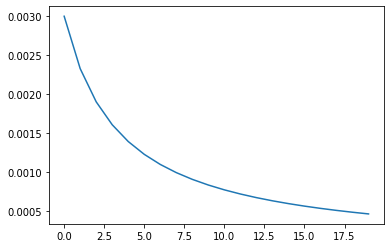

In [58]:
import matplotlib.pyplot as plt
plt.plot(history[0].history['lr'])


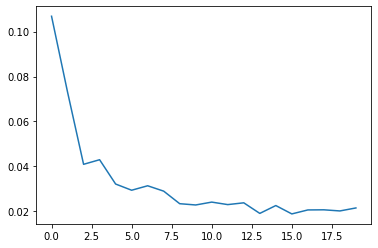

In [59]:
plt.plot(history[0].history['val_loss'])